In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from sklearn import metrics

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 7.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

<!-- dom:TITLE: Homework 1, PHY 959 -->
<!-- dom:AUTHOR: [PHY 959: Machine Learning in Physics]-->


# PHY 959: Homework Set #3
Due: **February 23, 2021**

___
***


# Problem 1: Exploring k-Means Clustering

In this problem, we will gain some experience with k-Means clustering.  The k-Means algorithm is relatively simple, wherein the user specifies a number of target clusters to be made and provides an initial seed position for the clusters.  Then, clusters are formed iteratively by (1) associating each object to the nearest cluster center and (2) updating the cluster center by evaluating the average position in each dimension from the objects associated with the cluster.

Rather than build your own clustering algorithm, we will explore the use of the k-Means clustering algorithm implemented in ```sci-kit learn```.  We will also use several of the tools provided by ```scikit-learn``` to help gain experience with how useful they are.  In particular, we will rely on metrics to help us gauge the quality and reliability of the clustering results:

1. Adjusted Rand Index wherein larger values indicate better clustering results.  Can only use this if we have the truth labels.
1. Silhouette Score wherein larger values indicate better clustering results.
1. Davies-Bouldin Score wherein lower values indicate better clustering results.

There will be two parts to this problem:

  1. Explore a simple N-cluster problem with four primary configurable parameters;
  2. Use your experience with basic clustering to tackle a more challenging "real world" data set;


# Part 1:  k-Means Clustering of Gaussian Data

In this part, you're provided an example of how to make a Gaussian cluster dataset where the number of clusters and their standard deviations are provided by the user.  You're also provided an example of how to set up the scikit-learn k-Means algorithm.


## Part 1a: Getting comfortable with k-Means

Your task is to run K-means several times but varying the following: 
- `n_trueClusters` (the true number of clusters to be generated)
- `std_dev` (spatial size of the clusters) 
- `n_points` (the number of data points in the clusters) 
- `n_kmClusters` (the number of clusters to be created by the k-Means algorithm) 

***
***

### Part 1a: Questions to answer
1. As the cluster compactness rises, what happens to the minimum cost (inertia) found by k-means? 
1. How do your qualitative evaluations of the clusters found vary as the number of true clusters vary? 
1. How does the minimum cost depend on the number of points in the clusters?
1. Do you observe similar trends with the other metrics (adjusted rand index, silhouette score and Davies-Bouldin Score)?

___
### First let's define some useful functions
---

In [2]:
#Plotting function
def plot_clusters(labels, clusters, X,iteration=0,idx1=0,idx2=1,xlabel="X",ylabel="Y"):
    unique_labels = set(labels)
    colors = cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, idx1], xy[:, idx2], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=5, alpha=0.5)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.plot(clusters[k,idx1],clusters[k,idx2],'o',markerfacecolor=col,
             markeredgecolor='k', markersize=20,alpha=0.8)
    plt.title('Clustering: Iteration %d'%(iteration))  

# Convenient way of getting metrics
def rank_clusters(X,labels,truth_labels=[],verbose=True):
    retval = np.zeros(2)
    retval[0] = metrics.silhouette_score(X,labels) #larger is better!
    retval[1] = metrics.davies_bouldin_score(X,labels) #lower is better!
    if len(truth_labels) > 0:
        retval2 = np.zeros(3)
        retval2[[0,1]] = retval
        retval2[2] = metrics.adjusted_rand_score(truth_labels, labels) #larger is better!
        retval = retval2

    if verbose:
        print("Silhouette Score: ",retval[0])
        print("Davies-Bouldin Score: ",retval[1])
        if len(truth_labels) > 0:
            print("Adjusted Rand: ", retval[2]) 
    return retval

___
### Generate Data
---

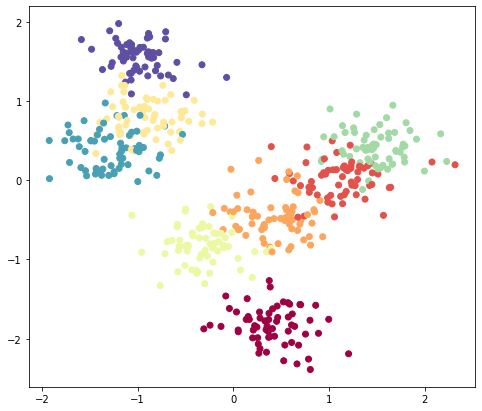

In [3]:
#Set cluster standard deviation and cluster number
std_dev=1
n_trueClusters = 8
n_dim = 2  #you can do this in N-D, but let's use 2D for easy viewing
n_points = 500
randState = 2

# Generate sample data
X, labels_true = make_blobs(centers=n_trueClusters,n_samples=n_points, 
                            n_features=n_dim, cluster_std=std_dev,random_state=randState)

# Perform standard scaling on the full set of clusters
X = StandardScaler().fit_transform(X)

#plot the data as a sanity check!
fig = plt.figure()
plt.scatter(X[:,0],X[:,1],c=labels_true,cmap=cm.Spectral)
plt.show()

***
### Now let's let k-Means find the clusters!!

We need to the number of clusters we want the algorithm to seed and we're off to the races.
***

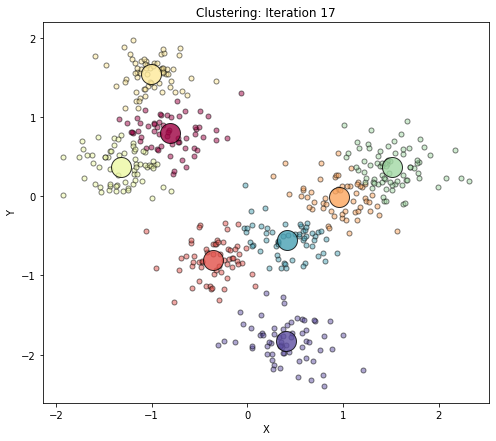

KM final cost:
 56.154535330049754
KM cluster centers:
 [[-0.80490619  0.79467294]
 [-0.35428637 -0.79951399]
 [ 0.9560928  -0.01336677]
 [-1.01198896  1.53979767]
 [-1.31873495  0.37006307]
 [ 1.51102381  0.36332864]
 [ 0.4169037  -0.54866428]
 [ 0.40266344 -1.82400822]]
Silhouette Score:  0.44520296707855206
Davies-Bouldin Score:  0.798652693814061
Adjusted Rand:  0.7292215960671659


array([0.44520297, 0.79865269, 0.7292216 ])

In [4]:
#First set up your parameters
n_kmClusters=8 #Set Number of Clusters

# Initialize KMeans and plot the results
km = KMeans(n_clusters=n_kmClusters,init="random")
km.fit(X)
labels = km.predict(X)

fig = plt.figure()
plot_clusters(labels,km.cluster_centers_,X,km.n_iter_)
plt.show()

#report from the k-Means results
print("KM final cost:\n",km.inertia_)
print("KM cluster centers:\n",km.cluster_centers_)

# evaluate three useful metrics
rank_clusters(X,labels,truth_labels = labels_true) 

***
## Part 1b: Elbow plot
Once you have some experience with the clustering, set `std_dev=1.0`, `n_samples=500`,  and `n_trueClusters=6`.  Use the elbow method to choose the "best" value of `n_kmClusters` and report your findings.  Explain why you made this choice.  Elbow plots are usually made using the "loss" function being minimized, which is the inertial for k-Means.  But you will also find it instructive to also plot the Adjusted Rand Index (ARI), Silhouette Score and Davies-Bouldin Score.  Note that the ARI requires the truth labels and the assigned cluster labels, so this can only be evaluated with a labeled dataset.

***
***
# Part 2:  Clustering real world data!

In part 2, we're going to load a data sample that describes a sample of customers who shop at a market.  Our goal is to perform a "Market Basket Analysis", wherein you will identify N types of target customers that you can hand over to the marketing team to inform their marketing strategy.

The data sample is contained in a CSV file called `Market_Customers.csv` which has four data columns:
  1. Customer ID: Arbitrary customer numbering.  There should be no discernable structure.
  2. Gender: Male or Female
  3. Age
  4. Annual Income
  5. Spending Score: A metric score that relates to the amount a customer spends in the store each month.
  
Your job is to perform k-Means clustering over the data to find clusters of customers who are distinct and can be effectively marketed to.  You can perform your clustering in any number of dimensions or combinations of those dimensions.  For example, you could cluster in all four dimensions at once or you could choose a subset of dimensions (the full space of options is 4D(1), 3D(4), 2D(6)).

You'll want to use your elbow plot skills from Part 1 to choose the best number of clusters for the number of clusters to make.  Given that we have only 200 customers in this data sample, I expect that you will typically find fewer than roughly 8 clusters (this also depends on the dimensionality).  In the following, I will lay out the steps to read the data sample and prepare it for processing.  You will also be provided some useful examples for manipulating the data.
  
## Your Task:

  1. Set up your code to perform k-means clustering on the market customer data.  Choose the best configuration of data to perform the clusters.  Report which variables are used, the number of clusters chosen and the cluster centers.
  
  2. Perform a high-level analysis of the clusters that explain why it makes sense for the people to be clustered together.  For example, "Younger, lower income customers" or "Thrifty parent-age customers".  Formulating a convincing explanation for your clusters will be more difficult with a larger number of clusters and with a larger number of dimensions analyzed.
  

### Useful things to consider:
  1. If you choose to include gender in your analysis, you will need to re-encode gender using a one-hot encoding scheme.  For example, you would set `male=1` and `female=0`, or vice versa.
  
  2. Making use of the metrics introduced in Part 1a is a wise way to decide whether you have the right number of clusters (eg, when making an elbow plot).  But for N dimensional problems with N>2, you can use these metrics to evaluate the benefit of including any given dimension.  For example, if N=3 you have 3 different 2D pairings, which can each be evaluated using your clustering metrics.
***
***

## Read in the data and analyze the structure

In [ ]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# we're using seaborn to read the CSV file, so let's set it up with 
# good behavior for notebooks
sns.set(context="notebook" , color_codes=True)
print(os.listdir("."))


In [6]:
# Importing the dataset
dataset = pd.read_csv('./Market_Customers.csv',index_col='CustomerID')
# Show the top (head) of the dataset
dataset.head()

,Gender,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [7]:
# report information on the dataset structure
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [8]:
# report statistics on the dataset
dataset.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
# check for nan/null items that would blow up your calculations
dataset.isnull().sum()

Gender                0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

Whew!!  No nans!  If there were we would need to correct them or blow up our k-Means algorithm
***

In [10]:
# check for duplicates and remove them if found
dataset.drop_duplicates(inplace=True)

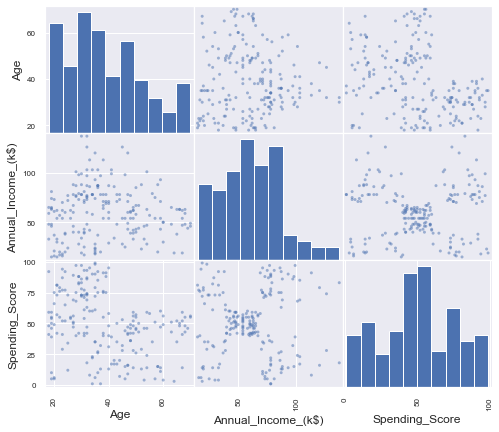

In [11]:
# scatter plot matrix
# Look for correlations!
scatter_matrix(dataset)
plt.show()

***
***
### Now let's access the data and get ready for clustering

In [12]:
#First set up your parameters
n_kmClusters=5 #Set Number of Clusters

# extract your data by the indices in the dataset:
# 0 = Gender
# 1 = Age
# 2 = Annual Income
# 3 = Spending Score
# This example obtains an array with Age, Income and Score.  Reduce/swap/reorder as desired.
Xmarket = dataset.iloc[:, [1,2,3]].values
#Xmarket = dataset.iloc[:, [2,3]].values #this version just grabs Income and Score

#check the shape of the data
print(Xmarket.shape)

(200, 3)
